In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
def show_graphics(df: pd.DataFrame, col: str, fecha: str):
    decomposition_air = seasonal_decompose(df[col], model='additive', period=8760)
    plt.figure(figsize=(18, 16))

    plt.subplot(4, 1, 1)
    plt.plot(df[fecha], df[col])
    plt.title('Original TS')

    plt.subplot(4, 1, 2)
    plt.plot(df[fecha], decomposition_air.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(df[fecha], decomposition_air.seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(df[fecha], decomposition_air.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.title('Residual Component')

    plt.tight_layout()
    plt.show()

In [54]:
df = pd.read_csv('../../data/homogenized/madrid_data/homogenized_data.csv', parse_dates=['Fecha'])
df.sort_values(by='Fecha', ascending=True, inplace=True)
df = df.dropna()
df

,Fecha,Hora,ESTACION_x,HUMEDAD RELATIVA,TEMPERATURA
0,2019-01-01,0,102,50.0,3.1
23,2019-01-01,23,102,55.0,3.4
22,2019-01-01,22,102,54.0,4.1
21,2019-01-01,21,102,49.0,5.8
20,2019-01-01,20,102,47.0,6.6
...,...,...,...,...,...
53305,2025-01-30,1,102,94.0,1.3
53304,2025-01-30,0,102,93.0,1.7
53327,2025-01-30,23,102,52.0,2.0
53315,2025-01-30,11,102,50.0,6.4


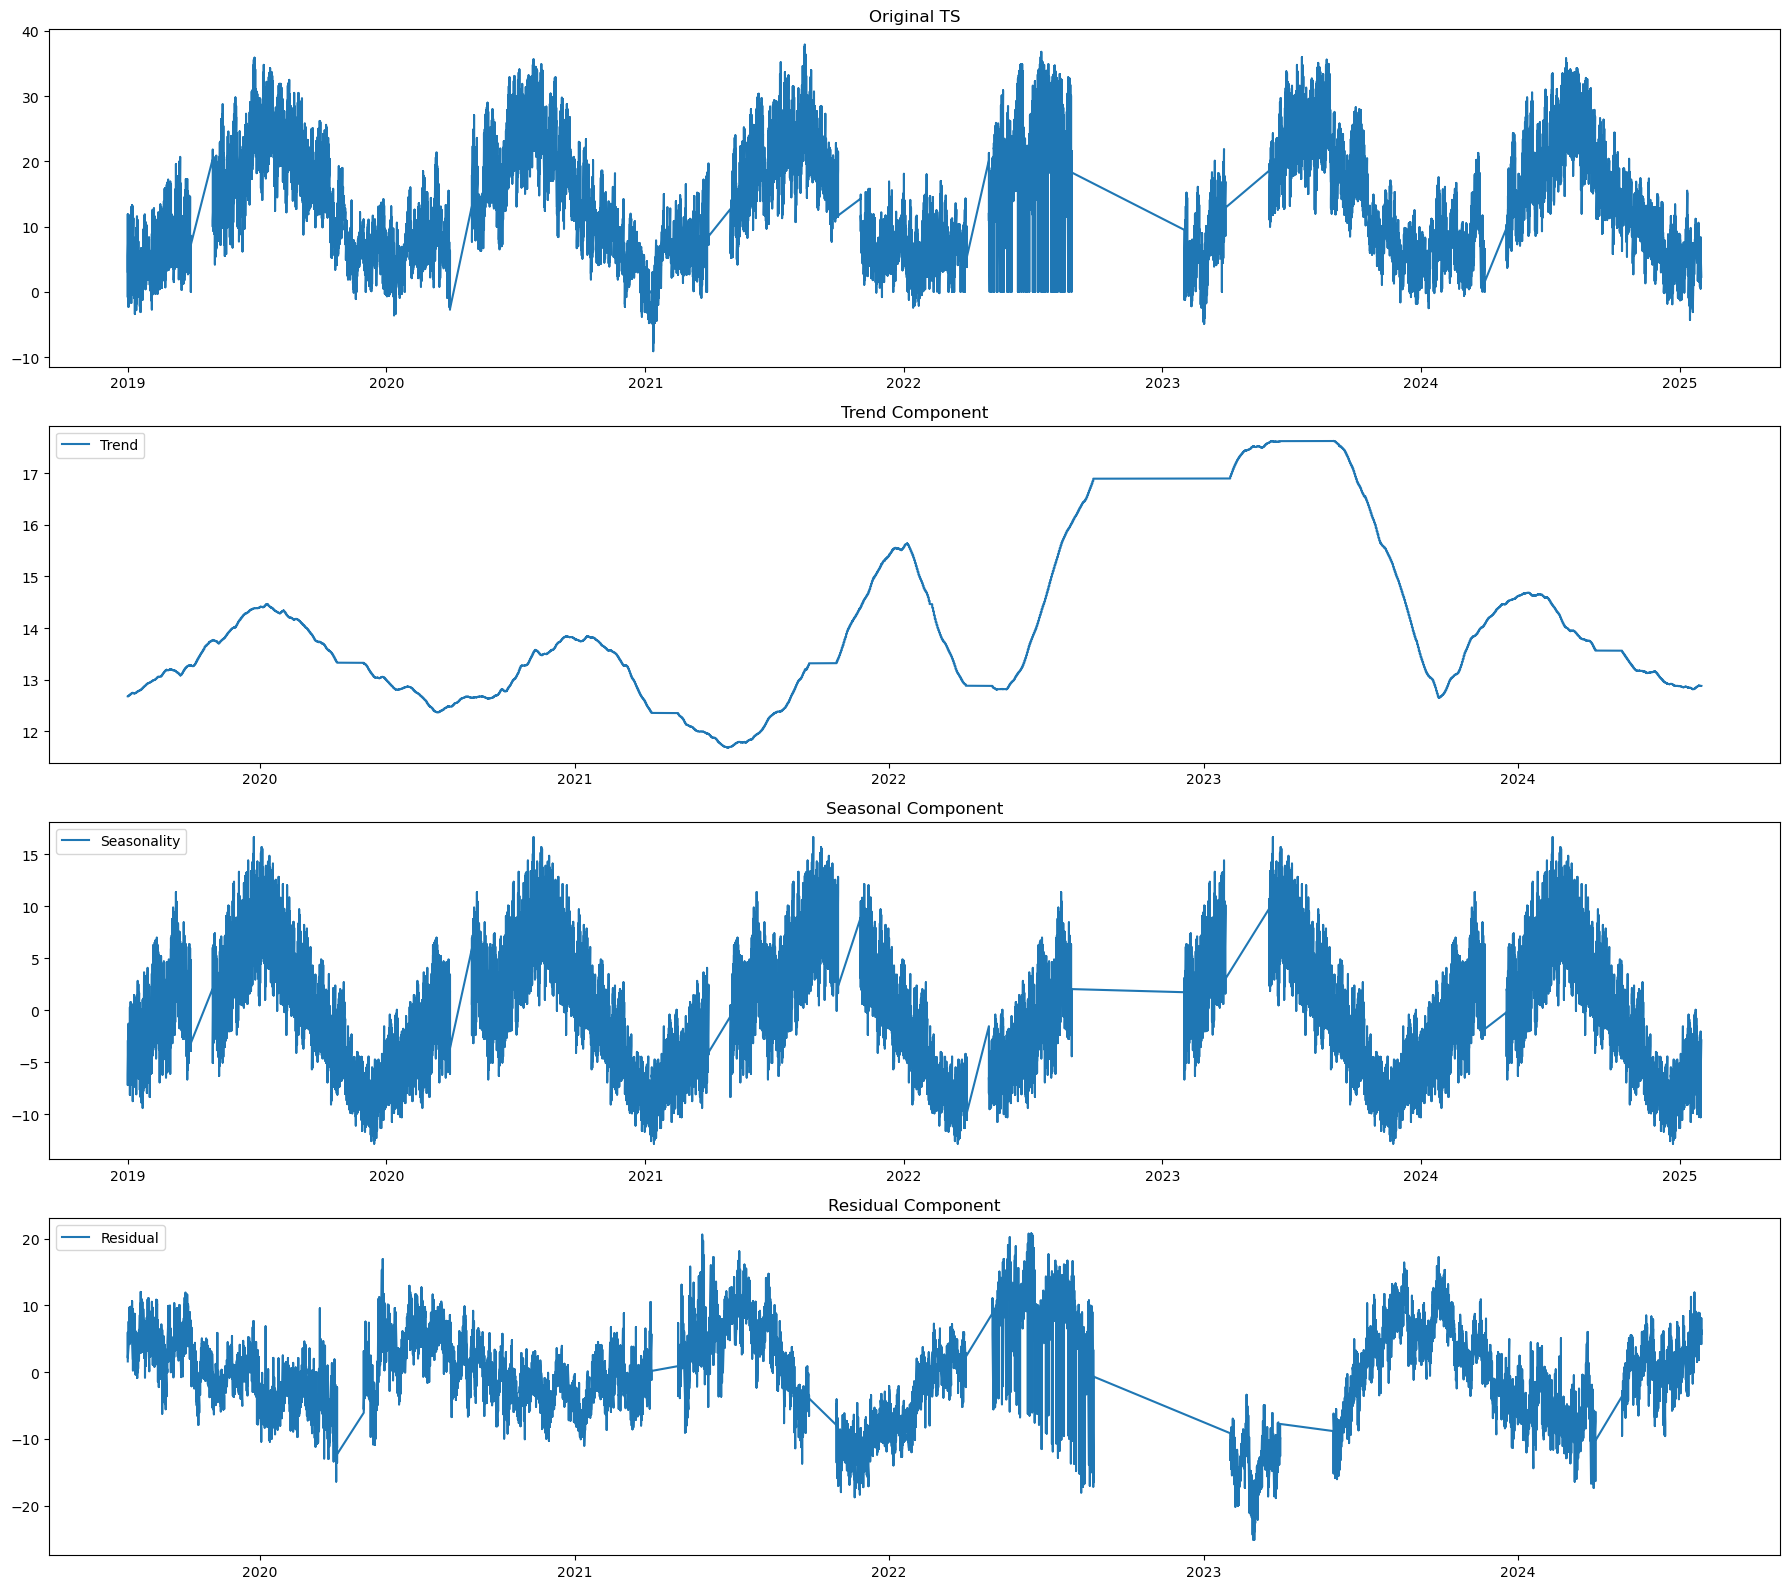

In [55]:
show_graphics(df=df, col='TEMPERATURA', fecha='Fecha')

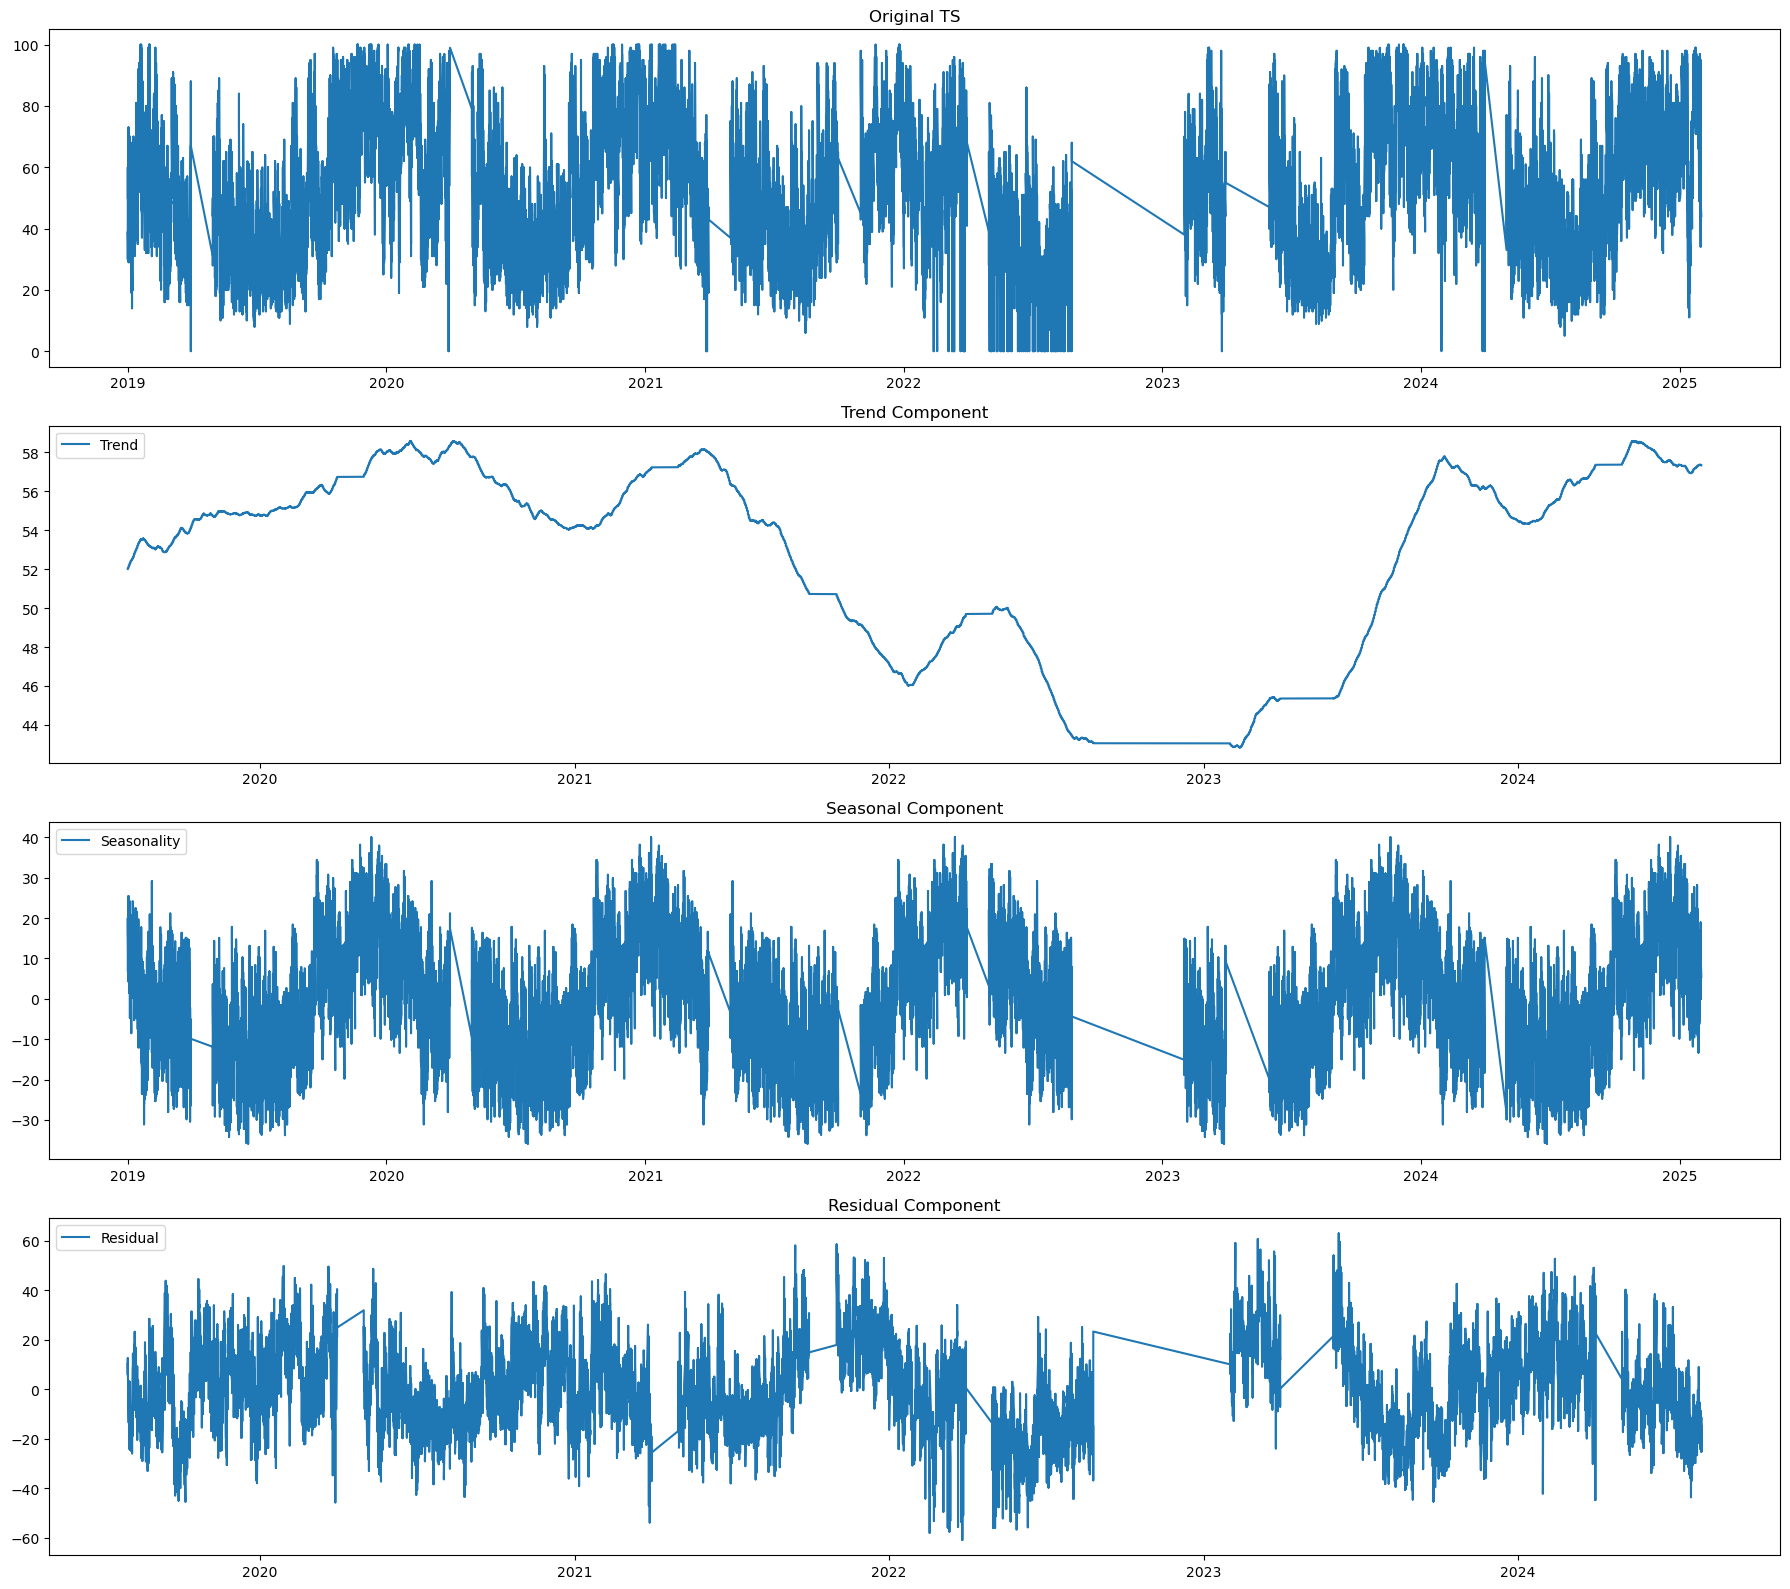

In [56]:
show_graphics(df=df, col='HUMEDAD RELATIVA', fecha='Fecha')

TRANSFORMADOS

In [57]:
df = pd.read_csv('../../data/transformed/madrid_data/transformed_data.csv', parse_dates=['fecha'])
df.sort_values(by='fecha', ascending=True, inplace=True)
df

,fecha,hora,indicativo,humedad_media,temperatura_media,anho,mes,dia
0,2019-01-01,0,102,50.0,3.1,2019,1,1
23,2019-01-01,23,102,55.0,3.4,2019,1,1
22,2019-01-01,22,102,54.0,4.1,2019,1,1
21,2019-01-01,21,102,49.0,5.8,2019,1,1
20,2019-01-01,20,102,47.0,6.6,2019,1,1
...,...,...,...,...,...,...,...,...
53305,2025-01-30,1,102,94.0,1.3,2025,1,30
53304,2025-01-30,0,102,93.0,1.7,2025,1,30
53327,2025-01-30,23,102,52.0,2.0,2025,1,30
53315,2025-01-30,11,102,50.0,6.4,2025,1,30


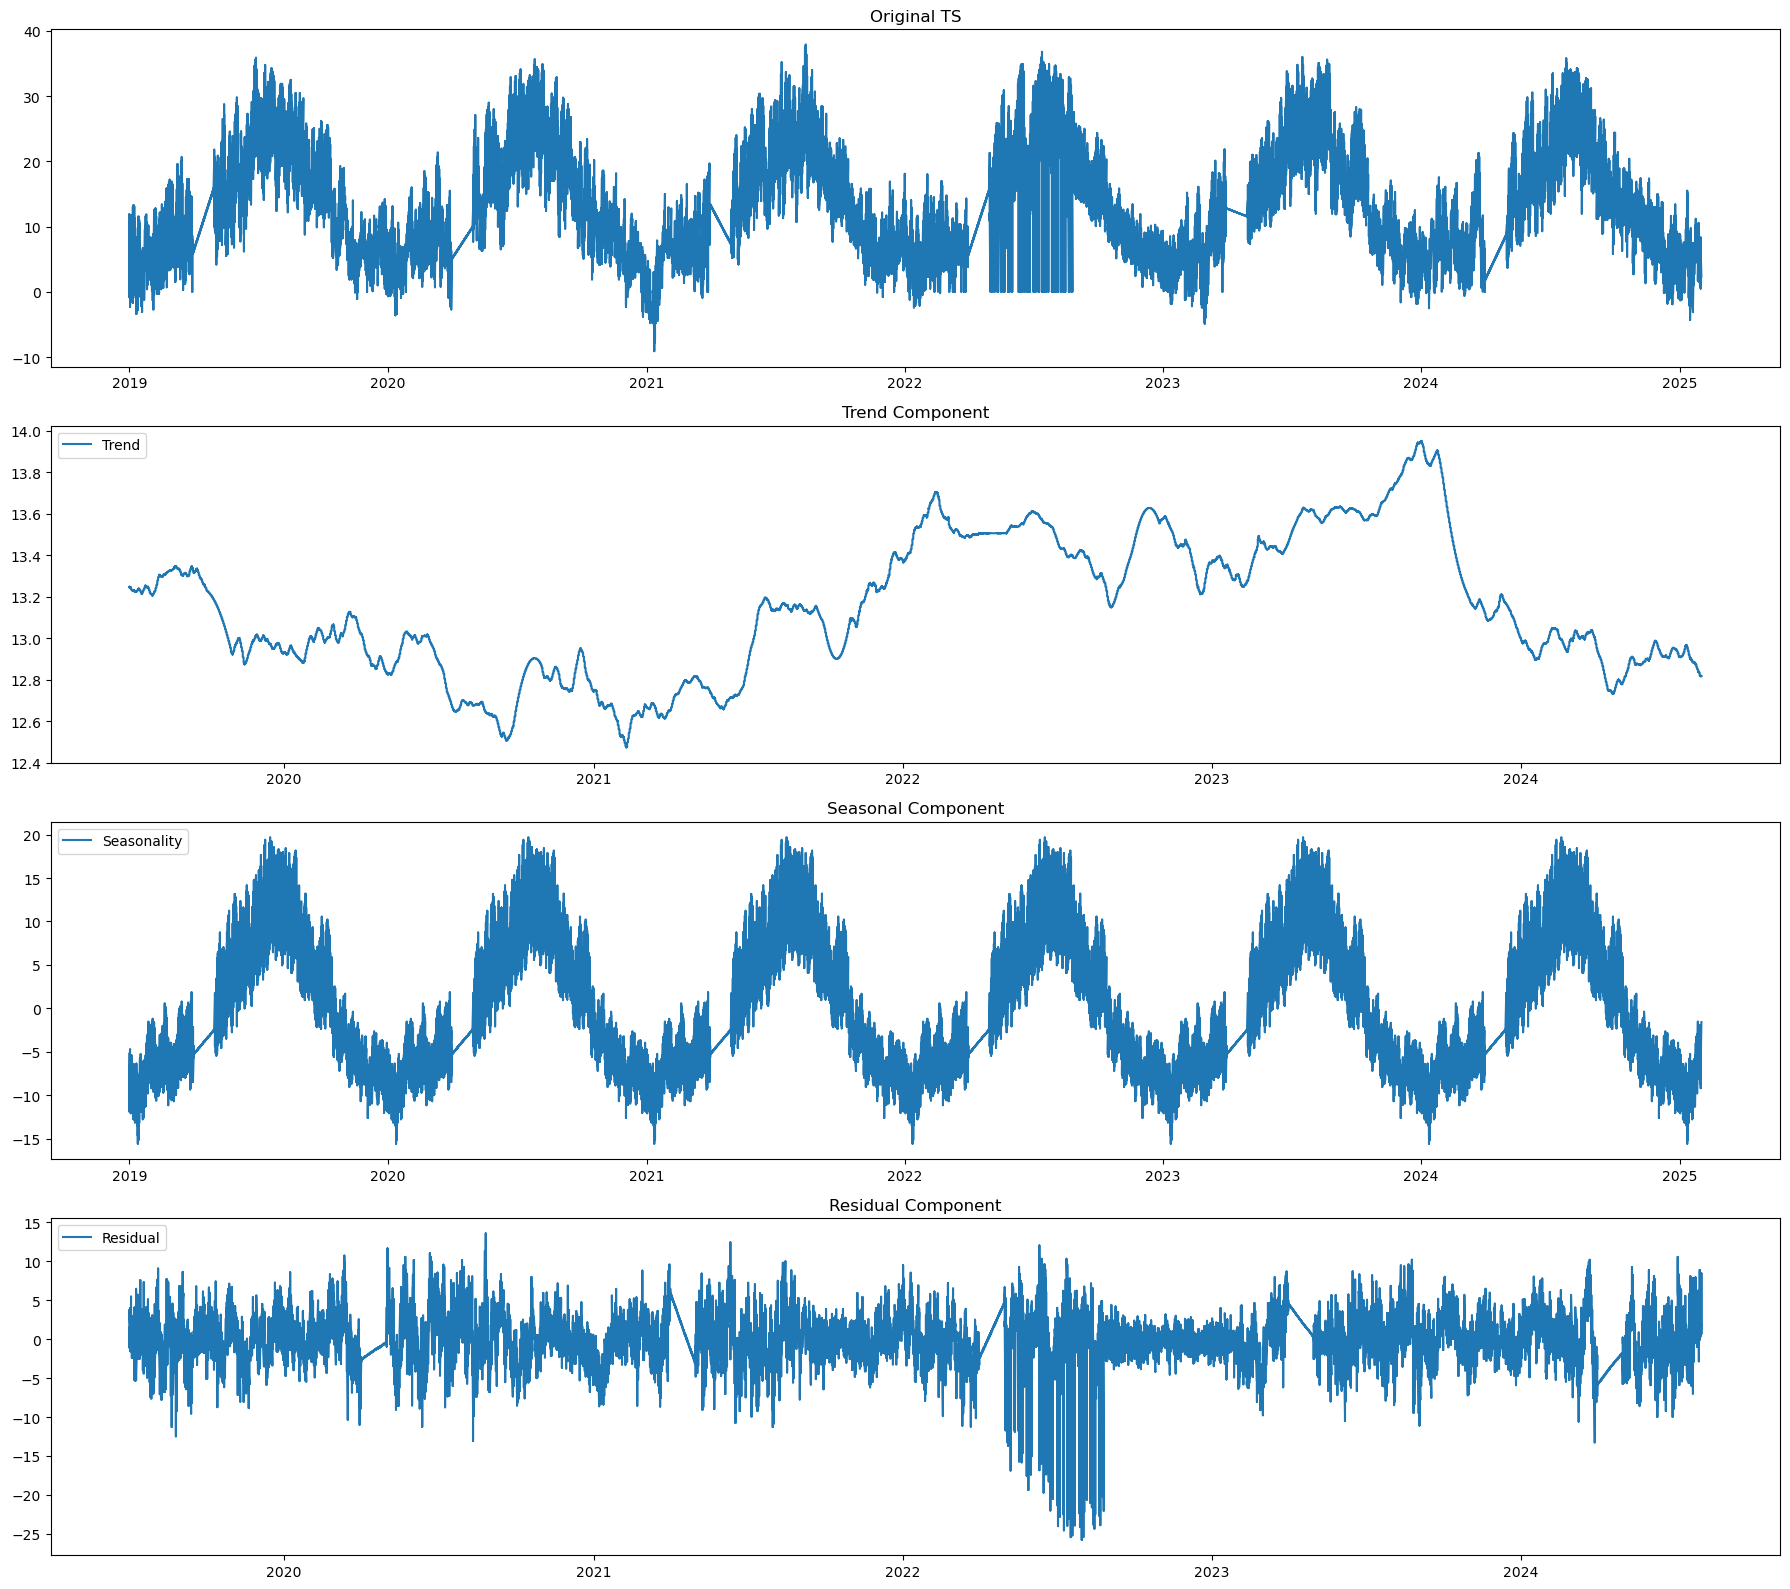

In [58]:
show_graphics(df=df, col='temperatura_media', fecha='fecha')

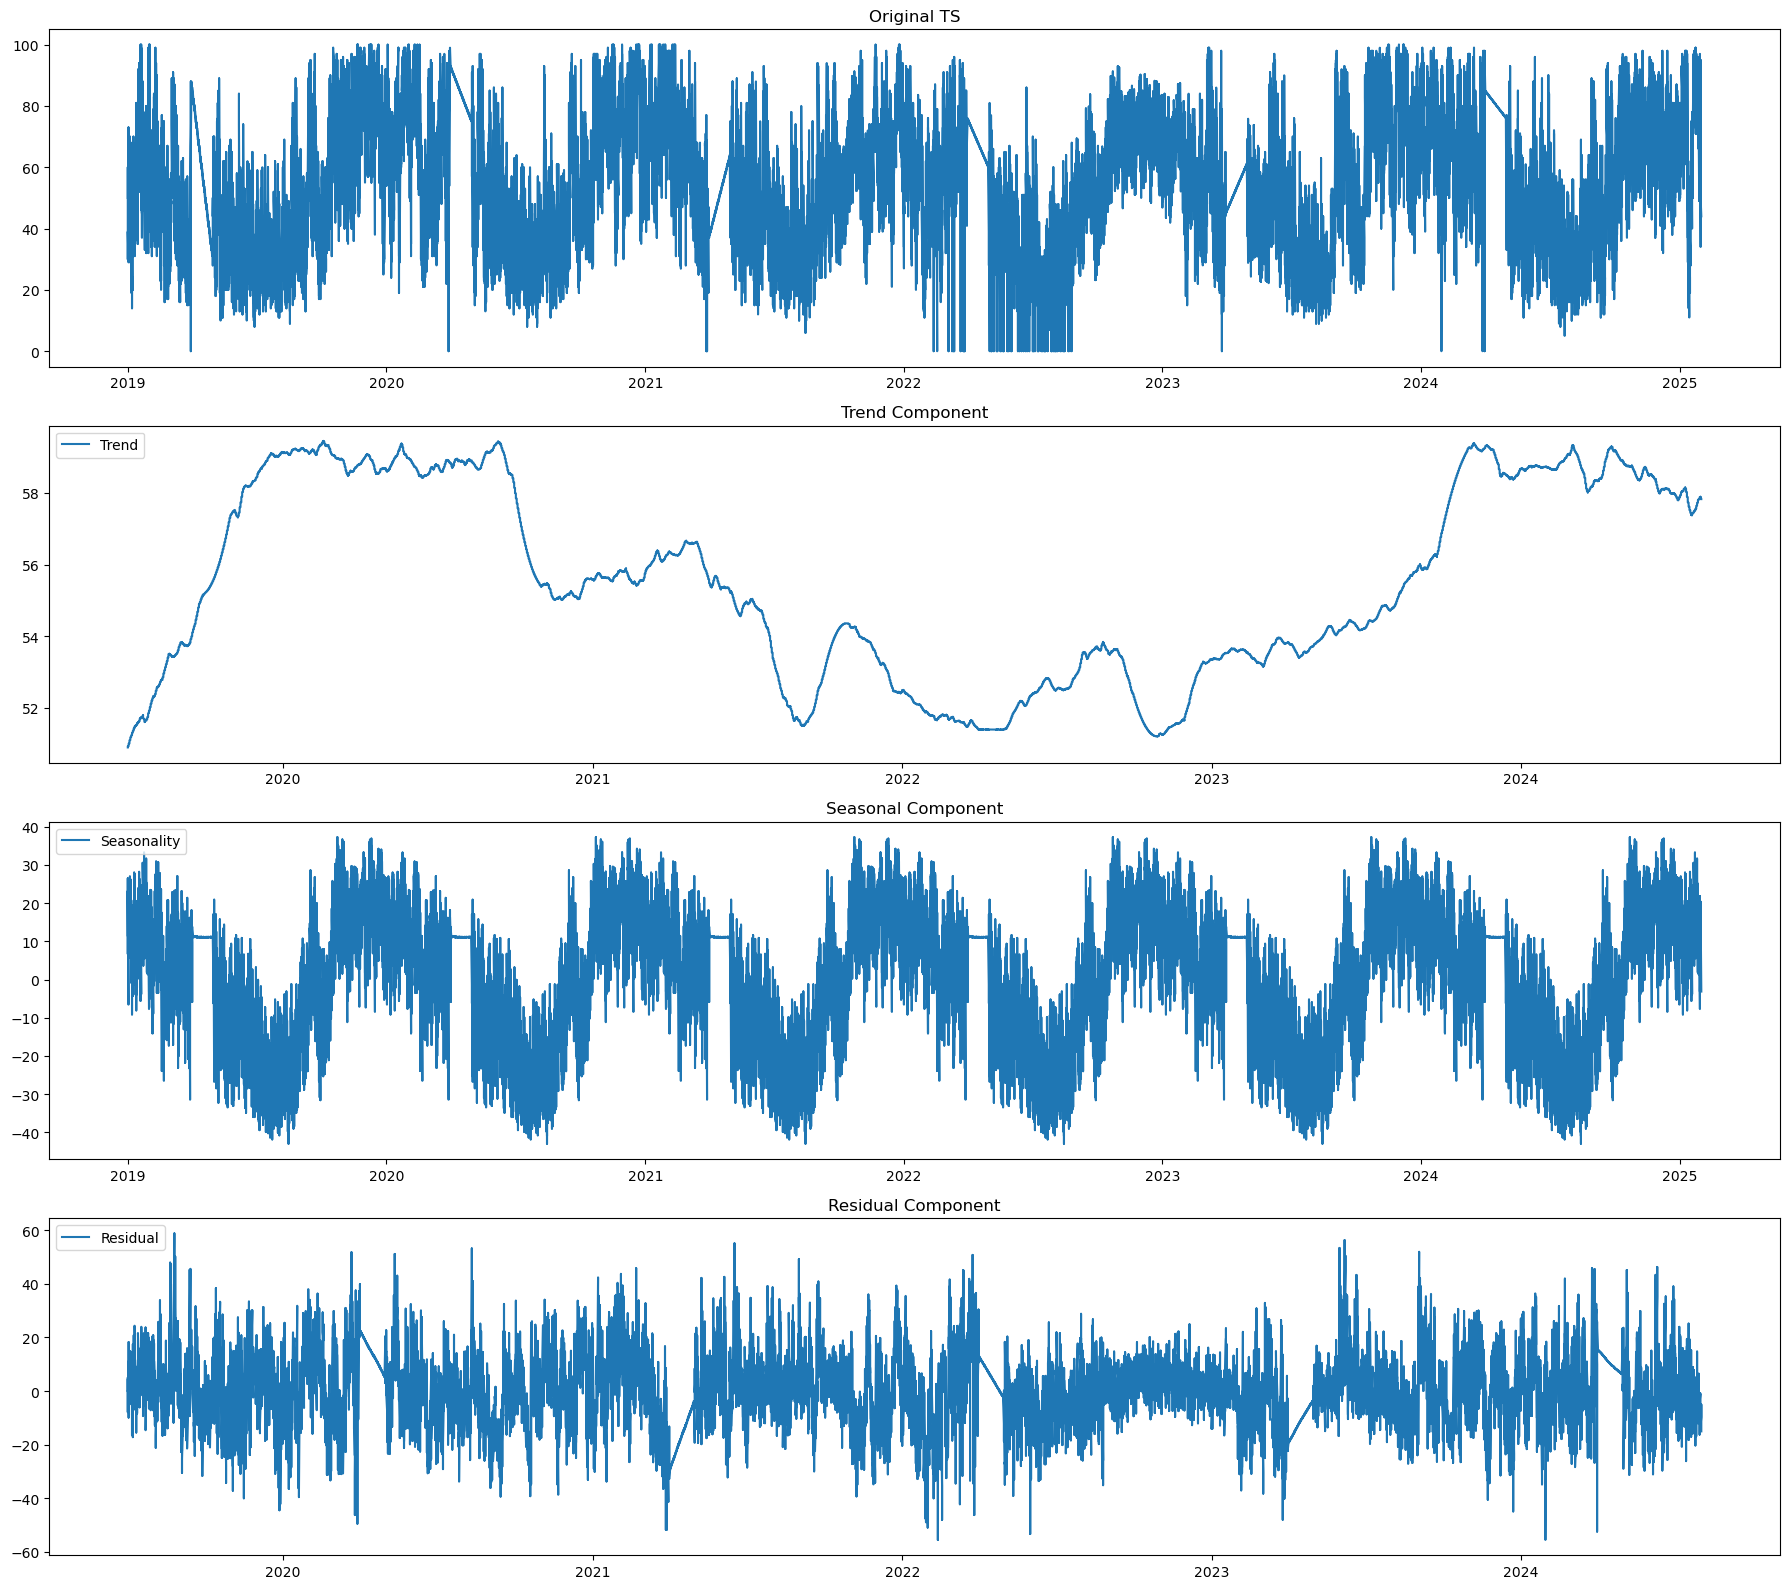

In [59]:
show_graphics(df=df, col='humedad_media', fecha='fecha')